In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro

import numpy as np
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'seaborn'

In [9]:
pwd

'/Users/juan/Desktop/IE/3RD YEAR/1ST SEMESTER/AI AND MACHINE LEARNING/PROJECT'

In [10]:
nba1 = pd.read_csv('/Users/juan/Desktop/IE/3RD YEAR/1ST SEMESTER/AI AND MACHINE LEARNING/PROJECT/salaries.stats2022.csv', delimiter = ';')
nba1

,Name,Position,Age,Height_i,Weight,Salary,Points,Rebounds,Assists
0,Juhann Begarin,SG,19,6.50,185,NaN,NaN,NaN,NaN
1,Jaylen Brown,SG,24,6.60,223,26758928.0,24.7,6.0,3.4
2,Kris Dunn,PG,27,6.30,205,5005350.0,1.3,1.5,0.5
3,Carsen Edwards,PG,23,5.11,200,1782621.0,4.0,0.8,0.5
4,Tacko Fall,C,25,7.50,311,NaN,2.5,2.7,0.2
...,...,...,...,...,...,...,...,...,...
553,Juwan Morgan,SF,24,6.70,232,NaN,1.2,1.0,0.3
554,Royce O'Neale,PF,28,6.40,226,8800000.0,7.0,6.8,2.5
555,Olumiye Oni,SG,24,6.50,206,1782621.0,NaN,NaN,NaN
556,Eric Paschall,F,24,6.60,255,1782621.0,9.5,3.2,1.3


In [11]:
nba2colnames = ['Name','Gamesplayed','Minpergame','FT','2PER','3PER','True shooting','Steals','Blocks','Turnovers','VI','Offensive rating','Defensive rating']
nba2advstats = pd.read_csv('/Users/juan/Desktop/IE/3RD YEAR/1ST SEMESTER/AI AND MACHINE LEARNING/PROJECT/advancednba.csv')
nba2advstats

,FULL NAME,GP,MPG,FT%,2P%,3P%,True shooting,Steals,Blocks,Turnovers,Versatiliy Index,Offensive rating,Defensive rating
0,Stephen Curry,63,34.2,0.916,0.569,0.421,0.655,1.21,0.13,3.38,11.8,118.8,108.6
1,Bradley Beal,60,35.8,0.889,0.540,0.349,0.593,1.15,0.37,3.12,9.7,113.3,110.5
2,Damian Lillard,67,35.8,0.927,0.519,0.391,0.623,0.93,0.25,3.03,10.8,124.8,116.1
3,Joel Embiid,51,31.1,0.859,0.541,0.377,0.636,0.98,1.35,3.12,12.1,120.8,100.1
4,Giannis Antetokounmpo,61,33.0,0.685,0.636,0.303,0.633,1.18,1.21,3.39,14.8,121.1,102.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,Ashton Hagans,2,2.1,0.000,0.000,0.000,NaN,0.00,0.00,0.50,0.0,NaN,NaN
622,Will Magnay,1,3.3,0.000,0.000,0.000,0.000,0.00,0.00,1.00,0.0,NaN,NaN
623,Ignas Brazdeikis,1,7.9,0.000,0.000,0.000,0.000,0.00,0.00,0.00,0.0,0.0,110.9
624,Gary Clark,2,6.4,0.000,0.000,0.000,0.000,0.50,0.00,0.00,0.0,56.9,100.4


# Creating our final dataset. Data Cleansing

Deleting missing values

In [12]:
nba1 = nba1.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
nba2 = nba2advstats.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

Renaming Name Column to use it as an index

In [13]:
nba2 =  nba2.rename(columns={"FULL NAME": "Name"})

In [14]:
nbafinal = nba1.join(nba2.set_index('Name'), on='Name', how='left')
nbafinal

,Name,Position,Age,Height_i,Weight,Salary,Points,Rebounds,Assists,GP,...,FT%,2P%,3P%,True shooting,Steals,Blocks,Turnovers,Versatiliy Index,Offensive rating,Defensive rating
1,Jaylen Brown,SG,24,6.60,223,26758928.0,24.7,6.0,3.4,58.0,...,0.764,0.535,0.398,0.586,1.24,0.55,2.72,9.2,111.6,107.3
2,Kris Dunn,PG,27,6.30,205,5005350.0,1.3,1.5,0.5,4.0,...,0.750,0.100,0.000,0.182,0.50,0.50,0.75,3.5,40.9,91.4
3,Carsen Edwards,PG,23,5.11,200,1782621.0,4.0,0.8,0.5,31.0,...,0.846,0.604,0.286,0.527,0.23,0.03,0.23,5.3,107.5,108.8
5,Bruno Fernando,F,23,6.90,240,1782621.0,1.5,2.4,0.3,33.0,...,0.682,0.429,0.000,0.475,0.12,0.09,0.64,6.0,85.6,102.2
6,Al Horford,C,35,6.90,240,27000000.0,14.2,6.7,3.4,28.0,...,0.818,0.510,0.368,0.538,0.89,0.93,1.04,9.8,111.2,109.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,Joe Ingles,SG,33,6.80,220,13036364.0,12.1,3.6,4.7,67.0,...,0.844,0.590,0.451,0.672,0.67,0.18,1.75,8.4,128.2,105.6
552,Donovan Mitchell,SG,25,6.10,215,28103500.0,26.4,4.4,5.2,53.0,...,0.845,0.476,0.386,0.569,0.98,0.28,2.77,10.1,114.8,105.4
554,Royce O'Neale,PF,28,6.40,226,8800000.0,7.0,6.8,2.5,71.0,...,0.848,0.586,0.385,0.599,0.80,0.45,1.17,6.2,120.0,102.1
556,Eric Paschall,F,24,6.60,255,1782621.0,9.5,3.2,1.3,40.0,...,0.713,0.533,0.333,0.561,0.30,0.18,1.08,7.8,105.6,105.1


In [15]:
nbafinal = nbafinal.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
nbafinal

,Name,Position,Age,Height_i,Weight,Salary,Points,Rebounds,Assists,GP,...,FT%,2P%,3P%,True shooting,Steals,Blocks,Turnovers,Versatiliy Index,Offensive rating,Defensive rating
1,Jaylen Brown,SG,24,6.60,223,26758928.0,24.7,6.0,3.4,58.0,...,0.764,0.535,0.398,0.586,1.24,0.55,2.72,9.2,111.6,107.3
2,Kris Dunn,PG,27,6.30,205,5005350.0,1.3,1.5,0.5,4.0,...,0.750,0.100,0.000,0.182,0.50,0.50,0.75,3.5,40.9,91.4
3,Carsen Edwards,PG,23,5.11,200,1782621.0,4.0,0.8,0.5,31.0,...,0.846,0.604,0.286,0.527,0.23,0.03,0.23,5.3,107.5,108.8
5,Bruno Fernando,F,23,6.90,240,1782621.0,1.5,2.4,0.3,33.0,...,0.682,0.429,0.000,0.475,0.12,0.09,0.64,6.0,85.6,102.2
6,Al Horford,C,35,6.90,240,27000000.0,14.2,6.7,3.4,28.0,...,0.818,0.510,0.368,0.538,0.89,0.93,1.04,9.8,111.2,109.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,Joe Ingles,SG,33,6.80,220,13036364.0,12.1,3.6,4.7,67.0,...,0.844,0.590,0.451,0.672,0.67,0.18,1.75,8.4,128.2,105.6
552,Donovan Mitchell,SG,25,6.10,215,28103500.0,26.4,4.4,5.2,53.0,...,0.845,0.476,0.386,0.569,0.98,0.28,2.77,10.1,114.8,105.4
554,Royce O'Neale,PF,28,6.40,226,8800000.0,7.0,6.8,2.5,71.0,...,0.848,0.586,0.385,0.599,0.80,0.45,1.17,6.2,120.0,102.1
556,Eric Paschall,F,24,6.60,255,1782621.0,9.5,3.2,1.3,40.0,...,0.713,0.533,0.333,0.561,0.30,0.18,1.08,7.8,105.6,105.1


Extracting the final dataset we created (Useful to inspect it as a csv)

In [229]:
import base64
import pandas as pd
from IPython.display import HTML

def create_download_link( nbafinal, title = "nbafinal csv", filename = "nbafinal.csv"):
    csv = nbafinal.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

df = pd.DataFrame(data = nbafinal, columns=nbafinal.columns)
create_download_link(df)

# Explanatory Data Analysis (EDA)

Analyzing the type of our variables

In [230]:
numerical_vars = []
print('\nNumerical variables:\n')
for c in nbafinal.columns:
    if nbafinal[c].dtype != 'object':
        print(c, ' : ', nbafinal[c].dtype)
        numerical_vars.append(c)

categorical_vars = []
print('\nCategorical variables:\n')
for c in nbafinal.columns:
    if nbafinal[c].dtype == 'object':
        print(c, ' : ', nbafinal[c].dtype)
        categorical_vars.append(c)



Numerical variables:

Age  :  int64
Height_i  :  float64
Weight  :  int64
Salary  :  float64
Points  :  float64
Rebounds  :  float64
Assists  :  float64
GP  :  float64
MPG  :  float64
FT%  :  float64
2P%  :  float64
3P%  :  float64
True shooting  :  float64
Steals  :  float64
Blocks  :  float64
Turnovers  :  float64
Versatiliy Index  :  float64
Offensive rating  :  float64
Defensive rating  :  float64

Categorical variables:

Name  :  object
Position  :  object


Exploring distribution of the predictors

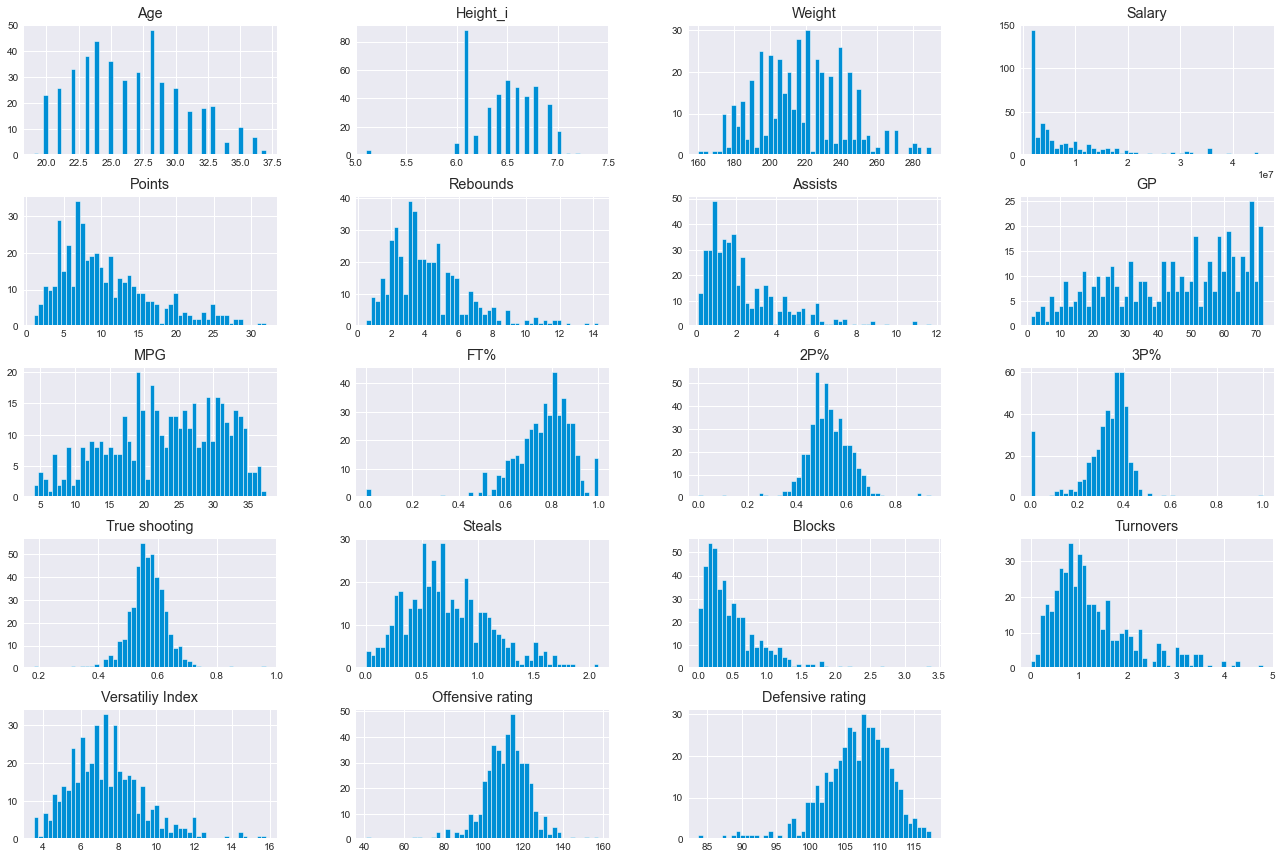

In [231]:
import matplotlib.pyplot as plt
nbafinal.hist(bins=50, figsize=(20,15))
plt.show()

Relation of categorical variable with target

<AxesSubplot:xlabel='Position'>

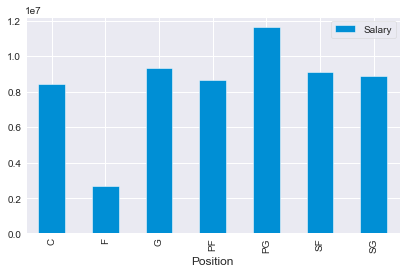

In [232]:
posdf = nbafinal.groupby('Position').mean()
posdf.plot.bar(y = 'Salary')

Relation of numerical variable with target (Also used to assess the existence of outliers)

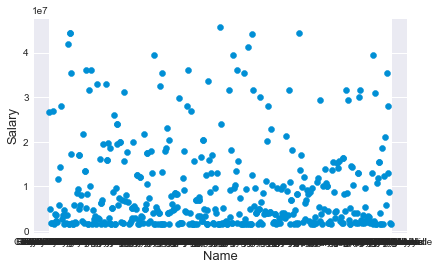

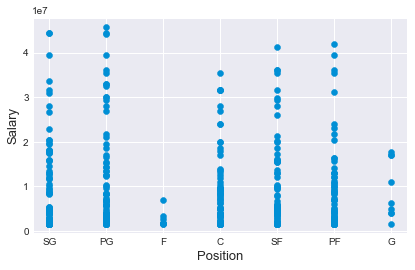

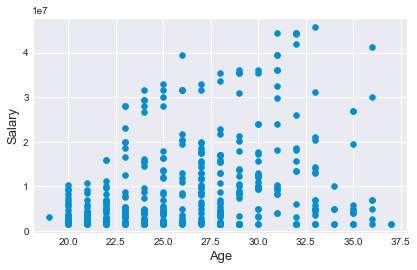

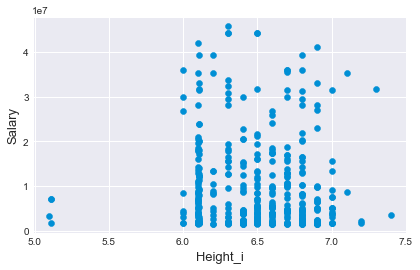

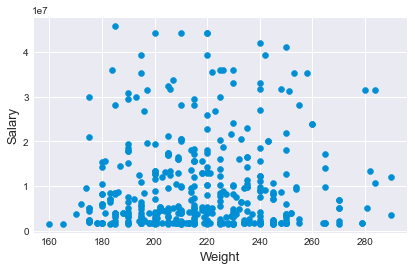

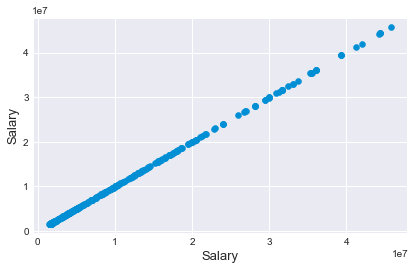

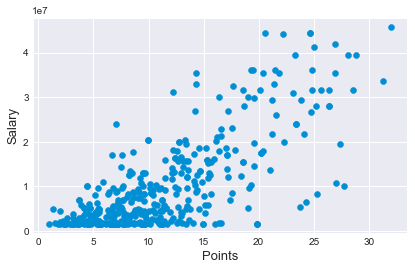

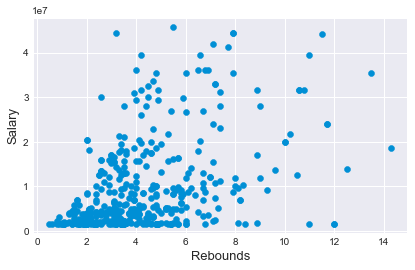

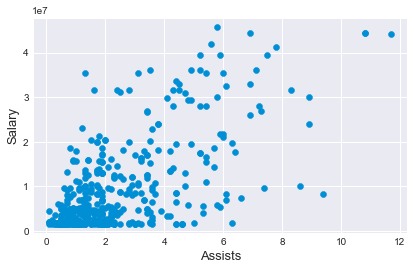

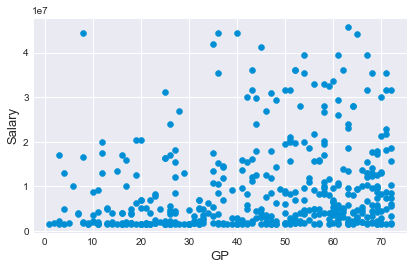

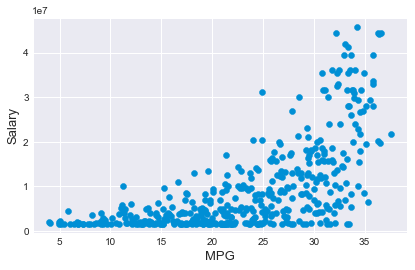

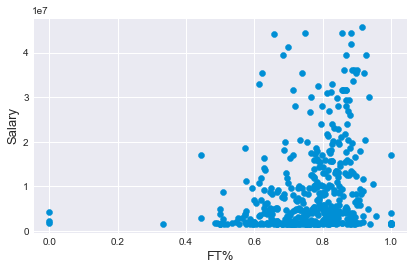

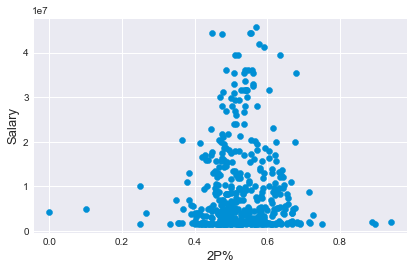

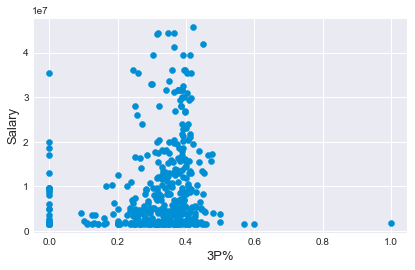

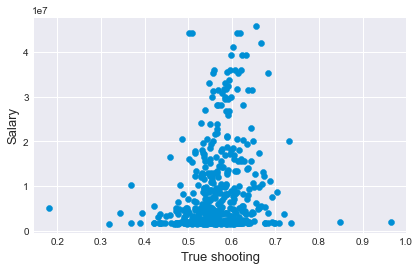

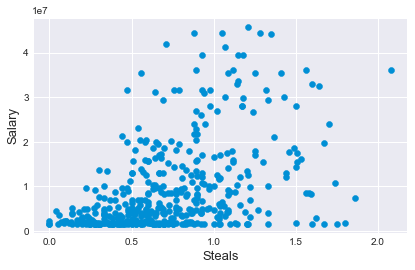

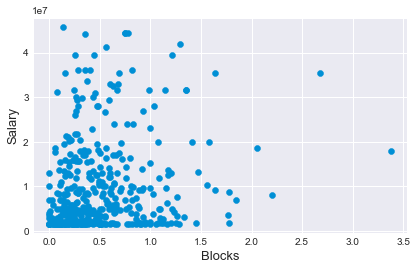

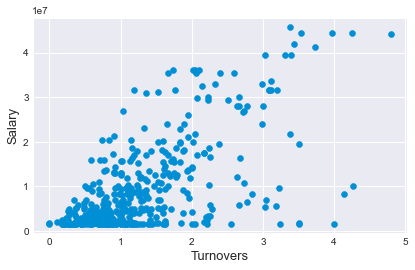

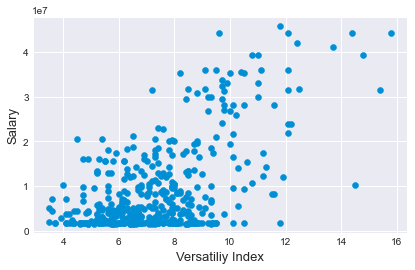

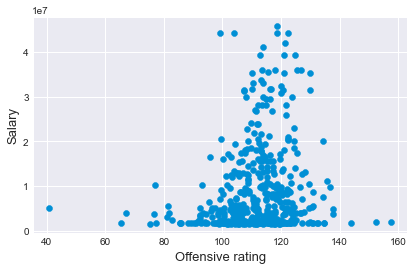

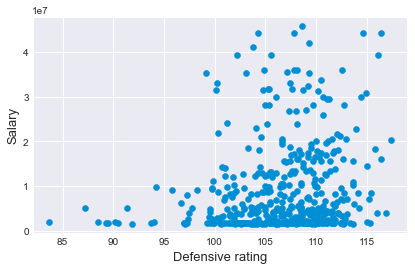

In [233]:
# Detection of outliers
for col in nbafinal.columns:
    plt.scatter(x = nbafinal[col], y = nbafinal['Salary'])
    plt.ylabel('Salary', fontsize=13)
    plt.xlabel(col, fontsize=13)
    plt.show()

As explained in the presentation, several variables present observation which can be identified as outliers. This is due to the fact that the players played very few games and achieved statistics that can't be maintain throughout an entire season (I.e: 3 PT % > 0.6 or Field Goal % > 0.8). We establish a 10 game minimum threshold to remove most of these observations.

In [234]:
# Removal of outliers 

nbafinal = nbafinal.loc[nbafinal["GP"] > 10]

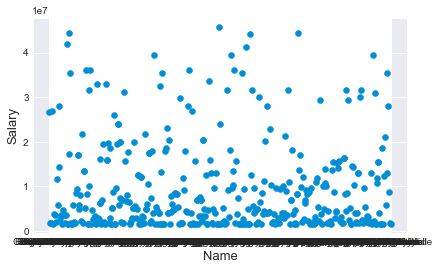

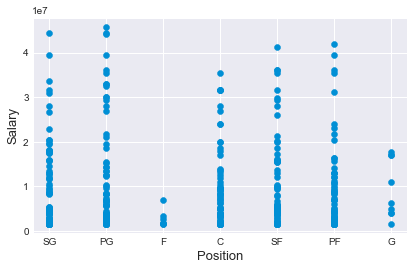

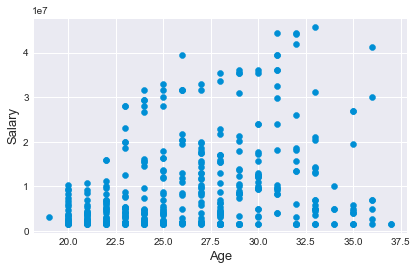

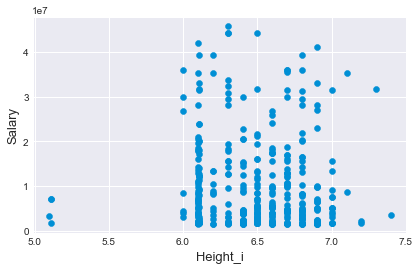

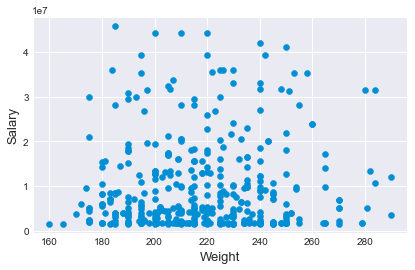

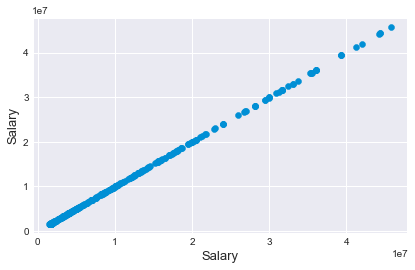

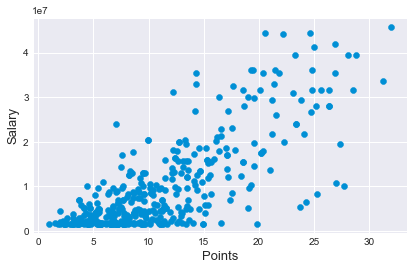

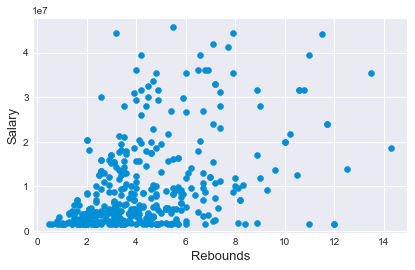

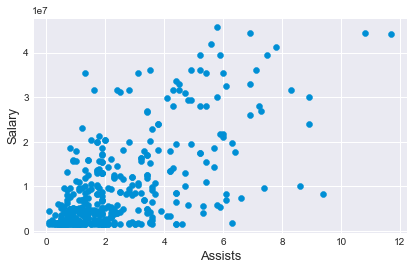

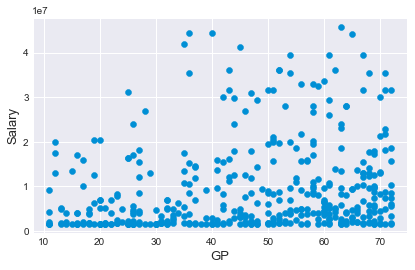

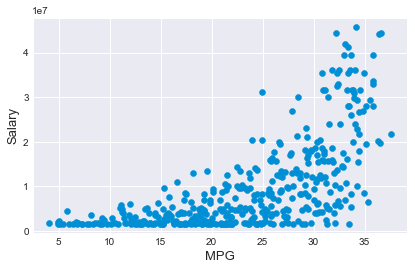

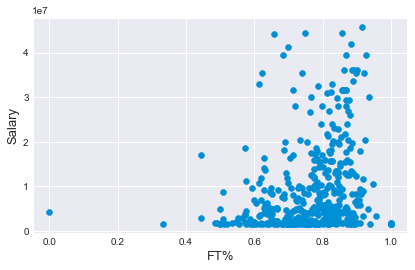

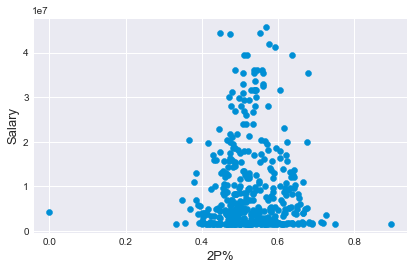

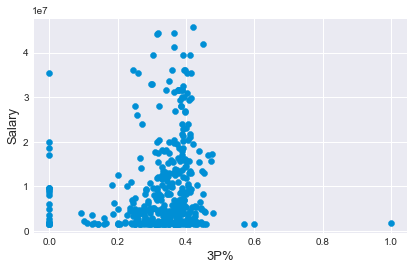

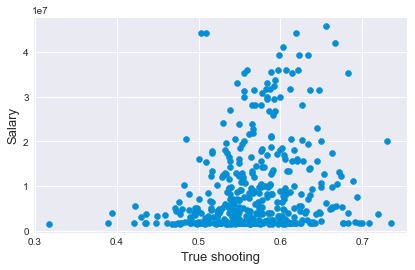

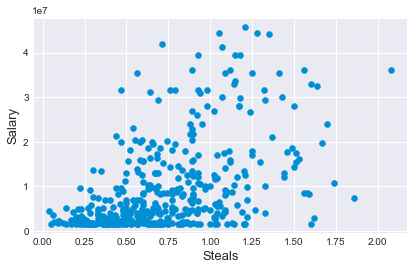

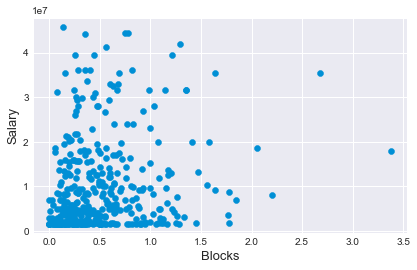

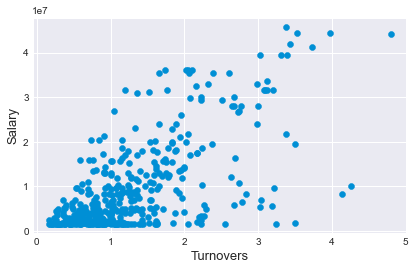

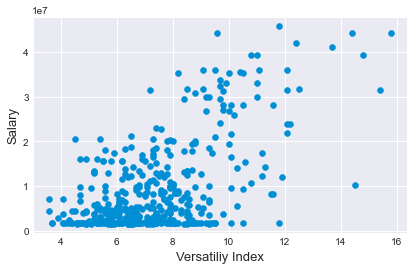

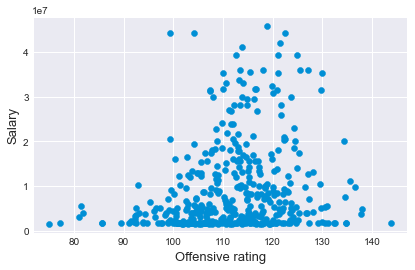

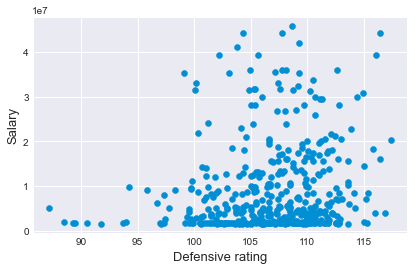

In [235]:
# We run the same code again to observe how the distribution has changed after removing outliers. 
for col in nbafinal.columns:
    plt.scatter(x = nbafinal[col], y = nbafinal['Salary'])
    plt.ylabel('Salary', fontsize=13)
    plt.xlabel(col, fontsize=13)
    plt.show()

# Feature Engineering

NORMALIZING VARIABLES. CREATING A NORMALIZED DATASET

In [236]:
from sklearn import preprocessing

#We remove the dependent variable and categorical predictors to allow the algorithm that perform the normalization
# through Min-Max method

nbanonobject = nbafinal.drop(['Name','Position','Salary'], axis = 1)

scaler = preprocessing.MinMaxScaler()
names = nbanonobject.columns
d = scaler.fit_transform(nbanonobject)
nbanormalized = pd.DataFrame(d, columns=names)
nbanormalized.head()

,Age,Height_i,Weight,Points,Rebounds,Assists,GP,MPG,FT%,2P%,3P%,True shooting,Steals,Blocks,Turnovers,Versatiliy Index,Offensive rating,Defensive rating
0,0.277778,0.652174,0.484615,0.764516,0.398551,0.284483,0.770492,0.907463,0.764,0.596433,0.398,0.642686,0.588235,0.162722,0.550756,0.459016,0.531295,0.665563
1,0.222222,0.004348,0.307692,0.096774,0.021739,0.034483,0.327869,0.143284,0.846,0.673356,0.286,0.501199,0.093137,0.008876,0.012959,0.139344,0.471616,0.715232
2,0.222222,0.782609,0.615385,0.016129,0.137681,0.017241,0.360656,0.080597,0.682,0.478261,0.000,0.376499,0.039216,0.026627,0.101512,0.196721,0.152838,0.496689
3,0.888889,0.782609,0.615385,0.425806,0.449275,0.284483,0.278689,0.710448,0.818,0.568562,0.368,0.527578,0.416667,0.275148,0.187905,0.508197,0.525473,0.721854
4,0.555556,0.434783,0.692308,0.329032,0.760870,0.094828,1.000000,0.605970,0.774,0.676700,0.250,0.762590,0.205882,0.198225,0.196544,0.418033,0.832606,0.605960


Analyzing the distribution of the target variable. Assessing normality.


 mu = 9339682.37 and sigma = 9948921.48



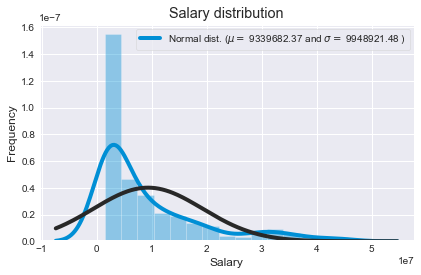

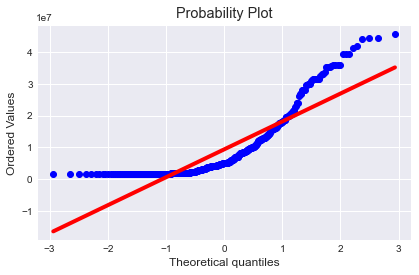

In [237]:
# Your code here
sns.distplot(nbafinal['Salary'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(nbafinal['Salary'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('Salary distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(nbafinal['Salary'], plot=plt)
plt.show()

After observing the distribution of the target variable we conclude that a transformation is needed. Given that it is right-skewed we will use a logarithmic transformation.

In [238]:
import statistics
import math

logsalary = np.log(nbafinal['Salary'])
nbafinal['logsalary'] = logsalary


 mu = 15.53 and sigma = 1.02



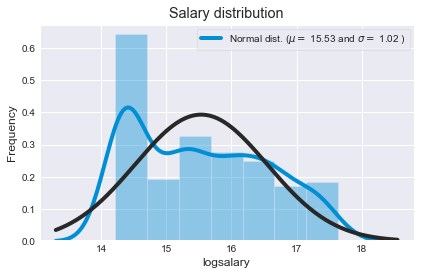

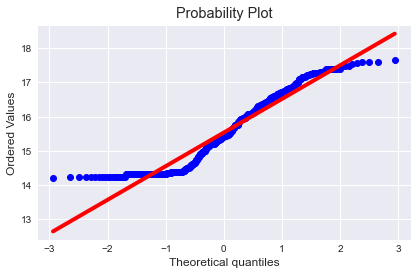

In [239]:
# Plotting logsalary
sns.distplot(nbafinal['logsalary'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(nbafinal['logsalary'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('Salary distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(nbafinal['logsalary'], plot=plt)
plt.show()

Analyzing the distribution of the predictors

In [240]:
for col in nbafinal.columns:
    if nbafinal[col].dtype == 'float64':
        print(col,':',nbafinal[col].skew())

Height_i : -0.5533090579501961
Salary : 1.6415052171493256
Points : 0.9946717016851424
Rebounds : 1.303604797413986
Assists : 1.582847947655224
GP : -0.3087933330510438
MPG : -0.3277025907105545
FT% : -1.160776637184364
2P% : -0.2775789985374549
3P% : -0.9819005728567213
True shooting : -0.1564455113114289
Steals : 0.6129386936483838
Blocks : 2.107262789617192
Turnovers : 1.2744508137626223
Versatiliy Index : 0.9746516248175356
Offensive rating : -0.21440203931465004
Defensive rating : -0.7883176584533816
logsalary : 0.31084534736625996


CREATING CONSISTENCY VARIABLE

In [241]:
nbanormalized2 = nbanormalized.drop(['Age','Weight','Height_i'],axis = 1)

In [242]:
nbaconsistency = nbanormalized2.copy(deep=True)
for col in nbanormalized2:
    newcolumn = []
    m = nbanormalized2[col].mean()
    for c in nbanormalized2[col]:
        beta = c - m  
        newcolumn.append(beta)
    nbaconsistency[col] = newcolumn
nbaconsistency

,Points,Rebounds,Assists,GP,MPG,FT%,2P%,3P%,True shooting,Steals,Blocks,Turnovers,Versatiliy Index,Offensive rating,Defensive rating
0,0.447896,0.125742,0.090127,0.195160,0.339623,-0.000357,0.008369,0.073879,0.044462,0.248716,0.019625,0.312038,0.146682,-0.004842,0.018701
1,-0.219846,-0.251070,-0.159873,-0.247463,-0.424556,0.081643,0.085292,-0.038121,-0.097025,-0.246382,-0.134221,-0.225759,-0.172990,-0.064521,0.068370
2,-0.300492,-0.135128,-0.177114,-0.214676,-0.487242,-0.082357,-0.109803,-0.324121,-0.221725,-0.300303,-0.116469,-0.137206,-0.115613,-0.383299,-0.150173
3,0.109186,0.176467,0.090127,-0.296643,0.142608,0.053643,-0.019502,0.043879,-0.070646,0.077148,0.132051,-0.050813,0.195863,-0.010664,0.074992
4,0.012412,0.488061,-0.099528,0.424668,0.038131,0.009643,0.088637,-0.074121,0.164366,-0.133637,0.055128,-0.042173,0.105699,0.296468,-0.040902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,0.041444,-0.048171,0.202196,0.342701,0.142608,0.079643,0.069685,0.126879,0.250697,-0.030696,-0.089842,0.102535,0.081109,0.236789,-0.037591
416,0.502734,0.009800,0.245300,0.113193,0.306787,0.080643,-0.057406,0.061879,0.003694,0.121265,-0.060256,0.322838,0.220453,0.041738,-0.044213
417,-0.123072,0.183713,0.012541,0.408275,0.253056,0.083643,0.065225,0.060879,0.075637,0.033030,-0.009961,-0.022735,-0.099219,0.117429,-0.153485
418,-0.042427,-0.077157,-0.090907,-0.099922,-0.170824,-0.051357,0.006140,0.008879,-0.015490,-0.212068,-0.089842,-0.042173,0.031928,-0.092178,-0.054147


In [243]:
import statistics
consistency = []
for i in nbaconsistency.index:
    dev = statistics.stdev(nbaconsistency.loc[i])
    consistency.append(dev)
    #print(i,"--",dev)
nbafinal['Consistency'] = consistency


# Model creation

MODEL VALIDATION.SPLITTING INTO TRAINING AND TEST SET

In [244]:
nbafinalindep = nbafinal.drop(['Salary', 'logsalary'], axis=1)
nbafinaldep = nbafinal['Salary']


In [245]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(nbafinalindep, nbafinaldep, test_size=0.2, random_state=42)

# X_train preparation
X_trainnamespos = X_train[['Name','Position']]
X_train = X_train.drop(['Name','Position'], axis = 1)

# X_test preparation 
X_testnamespos = X_test[['Name','Position']]
X_test = X_test.drop(['Name','Position'], axis = 1)

APPLYING THE MODEL

In [246]:
# Model applied to untransformed Salary (Model 1)
from sklearn.linear_model import LinearRegression
linmodel = LinearRegression()
linmodel.fit(X_train, y_train)
ypred = linmodel.predict(X_test)
ypred = ypred.reshape(-1, 1)
score1 = linmodel.score(X_test, y_test)

print('The accuracy of model 1 when predicting salary is', score1)

The accuracy of model 1 when predicting salary is 0.6913085000611874


In [247]:
# Model applied to log transformed Salary (Model 2)
y_trainlog = np.log(y_train)
y_testlog = np.log(y_test)

from sklearn.linear_model import LinearRegression
linmodel = LinearRegression()
linmodel.fit(X_train, y_trainlog)
ypredlog = linmodel.predict(X_test)
ypredlog = ypred.reshape(-1, 1)
score2 = linmodel.score(X_test, y_testlog)
print('The accuracy of model 2 when predicting salary is', score2)

The accuracy of model 2 when predicting salary is 0.6356638713041225


In [248]:
# Model applied to squared transformed Salary (Model 3)
y_trainsqd = y_train**2
y_testsqd = y_test**2

from sklearn.linear_model import LinearRegression
linmodel = LinearRegression()
linmodel.fit(X_train, y_trainsqd)
ypredlog = linmodel.predict(X_test)
ypredlog = ypred.reshape(-1, 1)
score3 = linmodel.score(X_test, y_testsqd)
print('The accuracy of model 3 when predicting salary is', score3)

The accuracy of model 3 when predicting salary is 0.642521130363197


Computing the importance of predictors for model 1

Feature 0: 3.257097
Feature 1: 0.965997
Feature 2: 0.757131
Feature 3: 5.938484
Feature 4: 1.677867
Feature 5: 4.488806
Feature 6: 1.268381
Feature 7: 2.317782
Feature 8: 0.829756
Feature 9: 0.726018
Feature 10: 0.737856
Feature 11: 0.856377
Feature 12: 2.224400
Feature 13: 1.358100
Feature 14: 3.429492
Feature 15: 2.009435
Feature 16: 1.072766
Feature 17: 0.839243
Feature 18: 0.801519


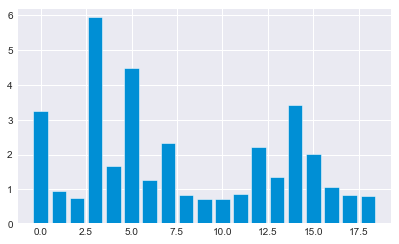

In [249]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot
 

# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_classif, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

COMPUTING OVERPAID AND UNDERPAID PLAYERS

In [250]:
nbanonobject['Consistency'] = consistency

In [251]:
nbanonobject
linmodel = LinearRegression()
linmodel.fit(X_train, y_train)
Expected_Salary = linmodel.predict(nbanonobject)
nbafinal['Expected_Salary'] = Expected_Salary

In [252]:
nbafinal['Difference'] = nbafinal['Salary'] - nbafinal['Expected_Salary']
nbafinal.sort_values(by='Difference', ascending=False)

,Name,Position,Age,Height_i,Weight,Salary,Points,Rebounds,Assists,GP,...,Steals,Blocks,Turnovers,Versatiliy Index,Offensive rating,Defensive rating,logsalary,Consistency,Expected_Salary,Difference
408,John Wall,PG,31,6.30,210,44310840.0,20.6,3.2,6.9,40.0,...,1.05,0.78,3.53,9.6,99.3,116.4,17.606740,0.214621,2.394745e+07,2.036339e+07
82,Ben Simmons,PG,25,6.11,240,33003936.0,14.3,7.2,6.9,58.0,...,1.60,0.60,2.98,11.0,114.0,100.2,17.312137,0.194671,1.400667e+07,1.899727e+07
123,Kevin Love,PF,33,6.80,251,31258256.0,12.2,7.4,2.5,25.0,...,0.64,0.08,1.52,9.8,107.4,110.2,17.257794,0.135939,1.375745e+07,1.750080e+07
255,Gary Harris,SG,26,6.40,210,20482143.0,9.9,2.0,2.0,19.0,...,0.89,0.21,0.74,4.5,112.0,111.6,16.835064,0.159688,4.578766e+06,1.590338e+07
64,Kemba Walker,PG,31,6.00,184,36016200.0,19.3,4.0,4.9,43.0,...,1.12,0.28,2.05,9.1,113.5,112.6,17.399479,0.120174,2.034439e+07,1.567181e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,Andre Drummond,C,28,6.10,279,1669178.0,14.9,12.0,2.0,21.0,...,1.10,0.95,2.05,8.9,106.1,89.5,14.327842,0.274972,1.812508e+07,-1.645590e+07
206,Trae Young,PG,22,6.10,180,8326471.0,25.3,3.9,9.4,63.0,...,0.84,0.17,4.14,11.6,116.9,111.9,15.934950,0.231030,2.507587e+07,-1.674940e+07
322,Carmelo Anthony,PF,37,6.70,238,1669178.0,13.4,3.1,1.5,69.0,...,0.67,0.55,0.88,6.5,111.4,111.1,14.327842,0.127062,1.856052e+07,-1.689134e+07
238,Victor Oladipo,SG,29,6.40,213,1669178.0,19.8,4.8,4.6,20.0,...,1.20,0.50,2.55,9.5,100.3,111.6,14.327842,0.204988,1.964006e+07,-1.797088e+07


In [253]:
nbasalaryexplanation = nbafinal[['Name','Salary','Expected_Salary','Difference']]
nbasalaryexplanation.sort_values(by='Difference', ascending=False)

,Name,Salary,Expected_Salary,Difference
408,John Wall,44310840.0,2.394745e+07,2.036339e+07
82,Ben Simmons,33003936.0,1.400667e+07,1.899727e+07
123,Kevin Love,31258256.0,1.375745e+07,1.750080e+07
255,Gary Harris,20482143.0,4.578766e+06,1.590338e+07
64,Kemba Walker,36016200.0,2.034439e+07,1.567181e+07
...,...,...,...,...
68,Andre Drummond,1669178.0,1.812508e+07,-1.645590e+07
206,Trae Young,8326471.0,2.507587e+07,-1.674940e+07
322,Carmelo Anthony,1669178.0,1.856052e+07,-1.689134e+07
238,Victor Oladipo,1669178.0,1.964006e+07,-1.797088e+07


In [254]:
nbasalaryexplanation.sort_values(by='Difference', ascending=True)

,Name,Salary,Expected_Salary,Difference
378,Luka Doncic,10174391.0,2.888812e+07,-1.871373e+07
238,Victor Oladipo,1669178.0,1.964006e+07,-1.797088e+07
322,Carmelo Anthony,1669178.0,1.856052e+07,-1.689134e+07
206,Trae Young,8326471.0,2.507587e+07,-1.674940e+07
68,Andre Drummond,1669178.0,1.812508e+07,-1.645590e+07
...,...,...,...,...
64,Kemba Walker,36016200.0,2.034439e+07,1.567181e+07
255,Gary Harris,20482143.0,4.578766e+06,1.590338e+07
123,Kevin Love,31258256.0,1.375745e+07,1.750080e+07
82,Ben Simmons,33003936.0,1.400667e+07,1.899727e+07


# CLUSTER ANALYSIS

In [255]:
import matplotlib.pyplot as plt
#from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [256]:
nbafinalwithpred = nbafinal
nbafinal = nbafinal.drop(['logsalary','Expected_Salary','Difference'], axis = 1)

In [257]:
kmeans = KMeans(
    init="random",
    
    n_init=10,
    max_iter=300, 
    random_state=42
)

In [258]:
nba1 = nbafinal.drop("Name", axis = "columns")
nba = nba1.drop("Position", axis = "columns")
nba
kmeans.fit(nba)

KMeans(init='random', random_state=42)

In [259]:
kmeans.cluster_centers_

array([[2.61204819e+01, 6.52301205e+00, 2.12421687e+02, 4.47863681e+06,
        8.75662651e+00, 3.60361446e+00, 1.85180723e+00, 4.70240964e+01,
        2.14445783e+01, 7.58228916e-01, 5.14722892e-01, 3.33204819e-01,
        5.57819277e-01, 6.65662651e-01, 4.27108434e-01, 1.04216867e+00,
        6.70963855e+00, 1.10338554e+02, 1.06893976e+02, 1.31877287e-01],
       [2.78461538e+01, 6.47282051e+00, 2.16871795e+02, 1.41235499e+07,
        1.35666667e+01, 4.60512821e+00, 2.48974359e+00, 4.75384615e+01,
        2.80205128e+01, 8.06487179e-01, 5.23512821e-01, 3.68384615e-01,
        5.77871795e-01, 8.86410256e-01, 5.05641026e-01, 1.42410256e+00,
        7.27692308e+00, 1.12615385e+02, 1.08051282e+02, 1.32953158e-01],
       [2.81470588e+01, 6.40764706e+00, 2.19558824e+02, 1.97445210e+07,
        1.63147059e+01, 5.61176471e+00, 3.60294118e+00, 4.91764706e+01,
        3.08441176e+01, 7.99058824e-01, 5.18235294e-01, 3.43000000e-01,
        5.80647059e-01, 9.23823529e-01, 6.30588235e-01, 1.7664

In [260]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(nba)
    sse.append(kmeans.inertia_)

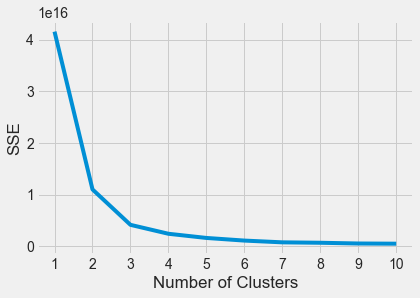

In [261]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [262]:
!pip install kneed
from kneed import KneeLocator

kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing")

kl.elbow

3

In [263]:
kmeans = KMeans(3)
y = kmeans.fit(nba)
y

KMeans(n_clusters=3)

In [264]:
identified_clusters = kmeans.fit_predict(nba)
identified_clusters

array([1, 0, 0, 1, 0, 0, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0,
       1, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 1, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 2, 2, 0,
       0, 2, 2, 0, 0, 0, 0, 1, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 2, 2, 2, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 2, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 1, 2, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0,
       1, 0, 0, 2, 0, 1, 0, 0, 0, 0, 1, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 1, 2, 0,

Text(0, 0.5, 'Points')

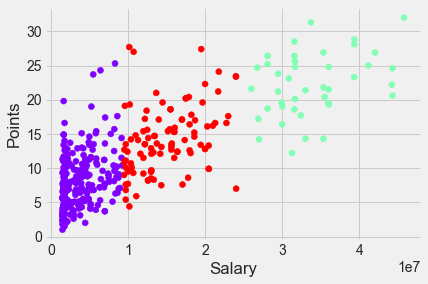

In [265]:
data_with_clusters = nba.copy()
x = "Salary"
y= "Points"

data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters[x],data_with_clusters[y],c=data_with_clusters['Clusters'],cmap='rainbow')
plt.xlabel(x)
plt.ylabel(y)


In [266]:
data_with_clusters.groupby("Clusters").mean()


,Age,Height_i,Weight,Salary,Points,Rebounds,Assists,GP,MPG,FT%,2P%,3P%,True shooting,Steals,Blocks,Turnovers,Versatiliy Index,Offensive rating,Defensive rating,Consistency
Clusters,,,,,,,,,,,,,,,,,,,,
0,25.703971,6.500975,216.267148,3.582908e+06,7.865343,3.604693,1.684116,43.382671,19.636101,0.745444,0.527267,0.313014,0.559426,0.618123,0.426751,0.976606,6.785199,110.524188,106.126354,0.138097
1,28.785714,6.491429,220.833333,3.374587e+07,22.342857,6.535714,5.435714,53.809524,33.261905,0.823524,0.534048,0.355095,0.592238,1.115238,0.653333,2.602619,10.659524,116.316667,107.900000,0.169668
2,27.712871,6.458614,220.287129,1.497896e+07,14.111881,5.130693,2.911881,50.326733,28.468317,0.791624,0.525386,0.341703,0.579188,0.887525,0.569208,1.542376,7.774257,113.972277,107.920792,0.143390


In [267]:
data_with_clusters.groupby("Clusters").count()

,Age,Height_i,Weight,Salary,Points,Rebounds,Assists,GP,MPG,FT%,2P%,3P%,True shooting,Steals,Blocks,Turnovers,Versatiliy Index,Offensive rating,Defensive rating,Consistency
Clusters,,,,,,,,,,,,,,,,,,,,
0,277,277,277,277,277,277,277,277,277,277,277,277,277,277,277,277,277,277,277,277
1,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42
2,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101


In [268]:
data_with_clusters['Name'] = nbafinal["Name"]
data_with_clusters["Position"] = nbafinal["Position"]
data_with_clusters

,Age,Height_i,Weight,Salary,Points,Rebounds,Assists,GP,MPG,FT%,...,Steals,Blocks,Turnovers,Versatiliy Index,Offensive rating,Defensive rating,Consistency,Clusters,Name,Position
1,24,6.60,223,26758928.0,24.7,6.0,3.4,58.0,34.5,0.764,...,1.24,0.55,2.72,9.2,111.6,107.3,0.142045,1,Jaylen Brown,SG
3,23,5.11,200,1782621.0,4.0,0.8,0.5,31.0,8.9,0.846,...,0.23,0.03,0.23,5.3,107.5,108.8,0.144532,0,Carsen Edwards,PG
5,23,6.90,240,1782621.0,1.5,2.4,0.3,33.0,6.8,0.682,...,0.12,0.09,0.64,6.0,85.6,102.2,0.118090,0,Bruno Fernando,F
6,35,6.90,240,27000000.0,14.2,6.7,3.4,28.0,27.9,0.818,...,0.89,0.93,1.04,9.8,111.2,109.0,0.122997,1,Al Horford,C
7,29,6.10,250,1669178.0,11.2,11.0,1.2,72.0,24.4,0.774,...,0.46,0.67,1.08,8.7,132.3,105.5,0.185646,0,Enes Kanter,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,33,6.80,220,13036364.0,12.1,3.6,4.7,67.0,27.9,0.844,...,0.67,0.18,1.75,8.4,128.2,105.6,0.123166,2,Joe Ingles,SG
552,25,6.10,215,28103500.0,26.4,4.4,5.2,53.0,33.4,0.845,...,0.98,0.28,2.77,10.1,114.8,105.4,0.163816,1,Donovan Mitchell,SG
554,28,6.40,226,8800000.0,7.0,6.8,2.5,71.0,31.6,0.848,...,0.80,0.45,1.17,6.2,120.0,102.1,0.145687,0,Royce O'Neale,PF
556,24,6.60,255,1782621.0,9.5,3.2,1.3,40.0,17.4,0.713,...,0.30,0.18,1.08,7.8,105.6,105.1,0.065413,0,Eric Paschall,F


In [269]:
cluster0 = data_with_clusters[data_with_clusters.Clusters == 0]
cluster1 = data_with_clusters[data_with_clusters.Clusters == 1]
cluster2 = data_with_clusters[data_with_clusters.Clusters == 2]

# Cluster 0 salary variable
cluster0dep = cluster0['Salary']
cluster0indep = cluster0.drop(['Name','Position','Salary','Clusters'], axis=1)

# Cluster 1 salary variable
cluster1dep = cluster1['Salary']
cluster1indep = cluster1.drop(['Name','Position','Salary','Clusters'], axis=1)

# Cluster 2 salary variable
cluster2dep = cluster2['Salary']
cluster2indep = cluster2.drop(['Name','Position','Salary','Clusters'], axis=1)

LINEAR MODELS FOR CLUSTER 0 

In [270]:
# Creating validation set for cluster 0
from sklearn.model_selection import train_test_split
X_train0, X_test0, y_train0, y_test0 = train_test_split(cluster0indep, cluster0dep, test_size=0.2, random_state=42)

In [271]:
from sklearn.linear_model import LinearRegression

linmodel = LinearRegression()
linmodel.fit(X_train0, y_train0)
ypredc = linmodel.predict(X_test0)
scorecluster0 = linmodel.score(X_test0, y_test0)


print('The accuracy of model for cluster 0 when predicting salary is', scorecluster0)

The accuracy of model for cluster 0 when predicting salary is 0.08938960221961623


The model is yielding negative values. A negative R² means that if someone knew the mean of our y_test sample and always used it as a "prediction", this "prediction" would be more accurate than our model, which means that the model is pretty bad. This could be due to the low number of observation on each cluster.

